Table of content
---


Import libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read data
---

In [2]:
df = pd.read_csv('../data/RAW_recipes.csv')
df.shape

(231637, 12)

In [3]:
df.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6


Check for missing values
---
The data is predominantly complete, except for 1 missing `name` and 4979 missing `description`s.

In [4]:
df.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

#### Missing `name`
I found 1 recipe without a name, `id = 368257`. I'm dropping this from my data since it won't serve any good to my final product.

In [5]:
df[df.name.isna() == True]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


**Remove** `id = 368257` **from data**

In [6]:
df.drop(index=721, inplace=True)

**Sanity check**

In [7]:
df[df.name.isna() == True]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


#### Missing `description`s
There are 4979 recipes without a descriptions. Descriptions are short introductions to a recipe from the contributors. Below is a description of recipe *! Arriba ! Baked Winter Squash Mexican-Style* as an example,
> Autumn is my favorite time of year to cook! This recipe can be prepared either spicy or sweet, your choice! Two of my posted Mexican-inspired seasoning mix recipes are offered as suggestions.

Source: [Food.com](https://www.food.com/recipe/arriba-baked-winter-squash-mexican-style-137739)

Missing recipe descriptions are acceptable, so I will let this be (for now).

In [8]:
df[df.description.isna() == True].head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
74,philly waldorf salad,5060,60,1534,1999-12-01,"['60-minutes-or-less', 'time-to-make', 'course...","[180.7, 22.0, 29.0, 3.0, 6.0, 33.0, 3.0]",4,"['combine softened cream cheese , orange juice...",NaN,"['philadelphia cream cheese', 'orange juice', ...",7
76,pizza stuffed potato,52443,25,1533,2003-01-28,"['30-minutes-or-less', 'time-to-make', 'course...","[183.3, 12.0, 9.0, 15.0, 21.0, 23.0, 6.0]",8,"['preheat oven to 450 degrees', 'cut potato in...",NaN,"['baking potato', 'mozzarella cheese', 'tomato...",7
99,the woiks dilly burgers,34930,32,23302,2002-07-24,"['bacon', '60-minutes-or-less', 'time-to-make'...","[449.2, 50.0, 16.0, 19.0, 58.0, 67.0, 2.0]",8,"['in a bowl , mix together the ground beef , m...",NaN,"[""mccormick's montreal brand steak seasoning"",...",9


Data types
---
I expected the `tags`, `nutrition`, `steps`, and `ingredients` columns to be list objects, not strings. I need to convert them into lists to dummy them later.

In [9]:
df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Check for duplicates
---
No ducplicate recipes found.

In [10]:
df[df.duplicated()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


Check for outliers
---
I'm checking the distribution of cooking time, `minutes` column, to see if there are outliers. 

Recipes that require more than 2 hours to cook are considered outliers because they are beyond the upper extremes (upper whisker) as seen on the boxplot below.

0.11 out of the 200,000+ recipe data are considered outliers. I will investigate further recipes that require longer than 2 hours to cook to find an explaination.

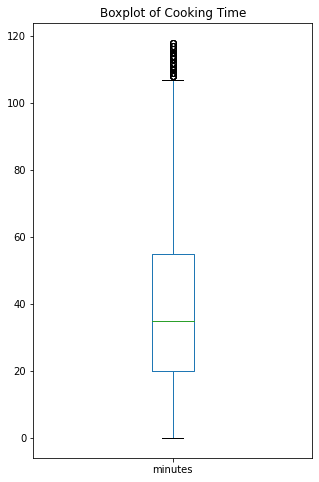

In [11]:
plt.figure(figsize=(5,8))
plt.title('Boxplot of Cooking Time')
df[df.minutes < 120]['minutes'].plot(kind='box');

In [12]:
print(f"{round(df[df.minutes > 120].shape[0]/df.shape[0],2)} out of the 200,000+ recipe data are considered outliers.")

0.11 out of the 200,000+ recipe data are considered outliers.


#### Investigating outliers
I dug into recipes that takes (approx.) 12 hours, 1 day, 1 month, 6 months and 1 year.

I found that most time-consuming recipes involves fermenting or freezing, which explains the time requirement. The following are a few quotes from recipe instructions (`steps`) to support,

| Recipe Name                    | Cooking Time | Quote                                                                                                                      |
|--------------------------------|--------------|----------------------------------------------------------------------------------------------------------------------------|
| Chocolate Banana Pudding Pops  | 12.0 hour    | Pour into ice pop molds and freeze 12 hours.                                                                               |
| Artisan Sourdough Garlic Bread | 1.0 day      | Combine the sponge ingredients in a large plastic bowl , cover with plastic wrap and keep in a warm place for 18-20 hours. |
| Lemon Vinegar                  | 1.0 month    | Cover and leave to go cold ... leave for 4 weeks.                                                                          |
| Homemade Fruit Liquers         | 7.0 month    | Cap and store in a cool , dark place , stir once a week for 2 - 4 weeks.                                                   |

More, the truly odd cases are the two recipes that takes longer than a year.

| Recipe Name               | Cooking Time |
|---------------------------|--------------|
| How to Preserve a Husband | 2.0 year     |
| No Bake Granola Balls     | 41 Century   |

Firstly, the [How to Preserve a Husband](https://www.food.com/recipe/how-to-preserve-a-husband-447963) recipe takes 2 years and is obviously, judging from the name, a (good-intended) joke. While gauging from the comments section, it is well received by the Food.com community, it is irrelevant to my recommender system and hence it's removed from my data.

Lastly, the [No Bake Granola Balls](https://www.food.com/recipe/no-bake-granola-balls-261647) takes centuries, 41 to be exact, is intuitively impossible given the name that says "No Bake". The recipe is imputed with the correct value that's listed on the website.

**Define a function that fetches time-consuming recipe details**

In [13]:
def get_deets(index, unit):
    """
    index = index of recipe in DataFrame
    unit  = desired time unit
    """
    
    unit_conversions = {'hour': 60,
                        'day':1440,
                        'month':43800}
    
    name = df.loc[index]['name']
    time = df.loc[index]['minutes']
    recipe = df.loc[index]['steps'][2:-2].split("', '")
    
    print(f'Name: {name.title() }')
    print('Cooking Time: '+str(round(time/unit_conversions[unit]))+' '+ unit)
    print(f'Recipe Steps: {recipe}')

**Recipe that requires 12 hours**

In [14]:
get_deets(49371, 'hour')

Name: Chocolate Banana Pudding Pops
Cooking Time: 12.0 hour
Recipe Steps: ['combine all ingredients in a blender', 'puree until smooth', 'pour into ice pop molds and freeze 12 hours']


**Recipe that requires 1 day**

In [15]:
get_deets(8966, 'day')

Name: Artisan Sourdough Garlic Bread
Cooking Time: 1.0 day
Recipe Steps: ['the sponge: combine the sponge ingredients in a large plastic bowl , cover with plastic wrap and keep in a warm place for 18-20 hours', 'when ready the sponge should have expanded and smell pleasantly sour and bubbling', 'bread: place sponge and all other ingredients except garlic in mixing bowl , mix well and let rest 20-30 minutes', 'mix again for 5-10 minutes , then cover and allow to rise 2-3 hours', 'turn out onto lightly greased surface and flatten like you would cinnamon rolls', 'sprinkle the garlic cloves evenly over the dough and roll up in cinnamon roll fashion pinching the sides in as you make a long oblong shaped loaf', 'allow the loaf to rise covered with a towel for 2 hours or till almost doubled in size', 'preheat oven to 475f', 'slash the top of the loaf 4 times with a sharp knife', 'spritz loaf and oven with water', 'bake in 475f oven for 3 minutes spraying 2 more times', 'turn the oven down to 

**Recipe that requires 1 month**

In [16]:
get_deets(122419, 'month')

Name: Lemon Vinegar
Cooking Time: 1.0 month
Recipe Steps: ['pour the vinegar into a stainless steel pan', 'wash the lemons and pare the rind from them with a potato peeler', 'add the peel to the pan with the bay leaves and boil for 5 minutes', 'cover and leave to go cold', 'bottle , including the peel and the bay', 'leave for 4 weeks', 'the vinegar can then either be strained and bottled or used as it is , depending on the strength you require']


**Recipe that requires more than 6 months**

In [17]:
get_deets(106563, 'month')

Name: Homemade Fruit Liquers
Cooking Time: 7.0 month
Recipe Steps: ['rinse the fruit or berries , fruit must be cut into small pieces', 'place berries or fruit in a container , add vodka', 'cap and store in a cool , dark place , stir once a week for 2 - 4 weeks', 'strain through metal colander', 'transfer the unsweetened liqueur to an aging container', 'to 3 cups ml unsweetened liqueur add 1 1 / 4 cup granulated sugar', 'let age for at least three months', 'pour carefully the clear liqueur to a new bottle', 'add more sugar if necessary', 'the flavor of almost all liqueurs improves during storage', 'fruit and berry liqueurs should be stored for at least 6 months for maximum taste', 'some lemon liqueurs should not be stored for a long time']


**Recipes that require more than a year (525600 minutes)**

The masked DataFrame below shows that there aren't a lot of time-consuming recipes beyond the 7-month mark. While the *Homemade Fruit Liquers* recipe is justified considering fermentations takes time, the recipe for *How to Preserve a Husband* and *No Bake Granola Balls* aren't.

Firstly, the *How to Preserve a Husband* recipe takes 288,000 minutes (approx. 2 years) and is obviously, judging from the name, a (good-intended) joke. While gauging from the comments section, it is well received by the Food.com community, it is irrelevant to my recommender system and hence it's removed from my data.

Lastly, the No Bake Granola Balls takes 2,147,483,647 minutes (approx. 41 centuries), is intuitively impossible given the name that says "No Bake". The recipe actually only takes 25 minutes when I checked the recipe on Food.com. The recipe is imputed with the correct value before moving forward.

In [18]:
df[df.minutes > 262800]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


**1. Removing How to Preserve a Husband from my data**

In [19]:
df.drop(index=109624, inplace=True)
df[df.minutes > 525600]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


**2. Imputing No Bake Granola Balls with the correct value**

In [20]:
df.loc[144074, 'minutes'] = 25
df.loc[144074, 'minutes']

25

Reset index
---

In [21]:
df = df.reset_index(drop=True)
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231630,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231631,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231632,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231633,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


Save to CSV
---

In [23]:
df.to_csv('../data/cleaned_recipes.csv', index = False)
pd.read_csv('../data/cleaned_recipes.csv').head(0)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
